# Prueba

In [4]:
from project_3.QAA import QAA  
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import minimize
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

[*********************100%%**********************]  5 of 5 completed
c:\Users\joalf\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "



Optimal Portfolio Weights for OMEGA QAA using MONTECARLO optimization:
ABBV    0.1
MET     0.1
OXY     0.1
PERI    0.7
Name: Optimal Weights, dtype: float64

---

Portfolio Return: 0.19%
Benchmark Return (SPY): 0.06%
Risk-Free Rate Return: 0.20%

---

Portfolio Volatility: 3.12%
Benchmark Volatility (SPY): 1.42%
Risk-Free Rate Volatility: 0.00%

---



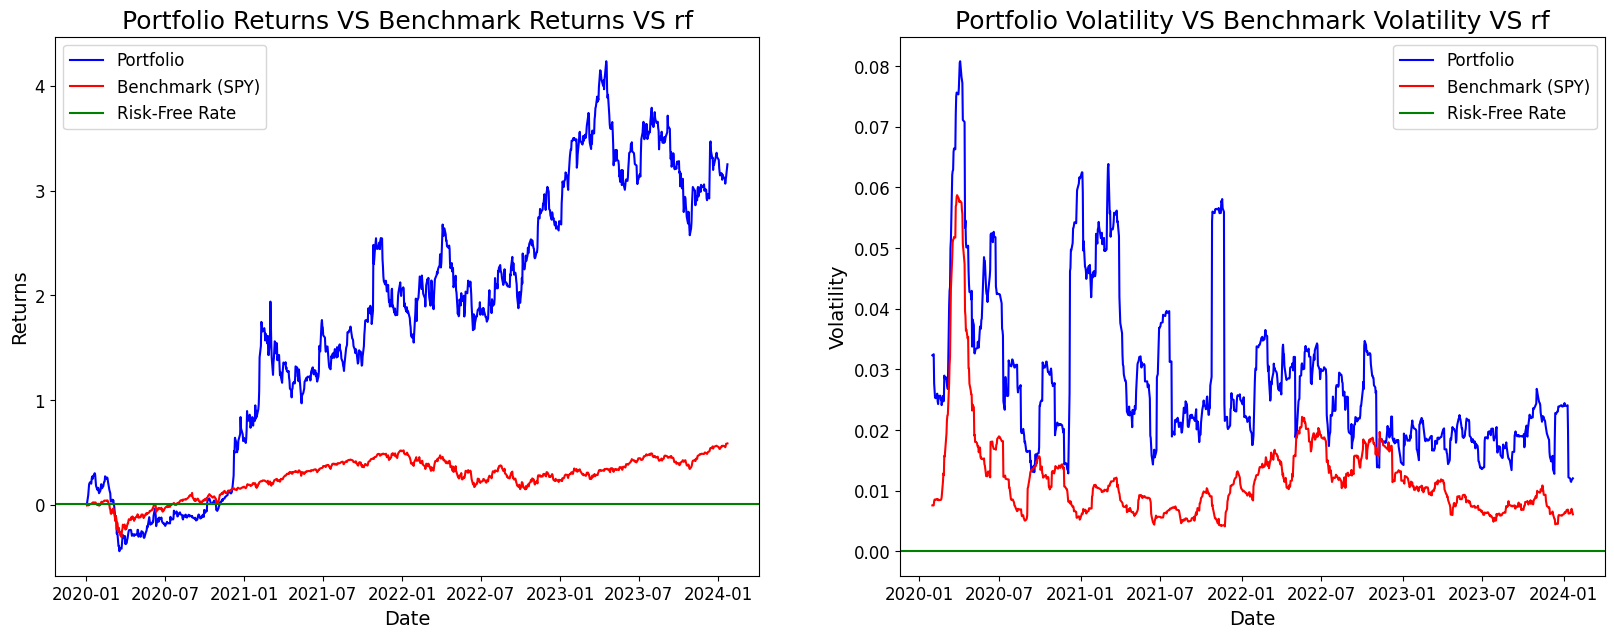

In [21]:
qaa_instance = QAA(
    tickers=["ABBV", "MET", "OXY", "PERI"],
    benchmark="SPY",
    rf=0.5,
    lower_bound=0.1,
    higher_bound=0.9,
    start_date="2020-01-02",
    end_date="2024-01-23",
    expected_returns=np.array([.15, .1, .1, .1]),
    opinions=np.array([[1, 0, 0, 0], [0, 1, -3, 0], [0, 0, 1, -1], [0, 0, 0, 0]]),
    MAR=0.2,
    # optimization_model="SLSQP",
    optimization_model="MONTECARLO",
    # optimization_model="GRADIENT DESCENT",
    # QAA_strategy="MIN VARIANCE",
    #QAA_strategy="MAX SHARPE RATIO",
    QAA_strategy="OMEGA",
    #QAA_strategy="SEMIVARIANCE",
    #QAA_strategy="SORTINO RATIO",
    #QAA_strategy="BLACK LITTERMAN",   # NO CORRE CON "GRADIENT DESCENT"
    #QAA_strategy="HRP",
    #QAA_strategy="ROY SAFETY FIRST RATIO",
    #QAA_strategy=""
    #QAA_strategy=""
    #QAA_strategy=""
)

try:
    data, returns, std, var, cov, corr = qaa_instance.assets_metrics()

    optimal_weights = qaa_instance.QAA_strategy_selection(returns=returns)

    qaa_instance.portfolio_metrics(returns)

except ValueError as ve:
    print(f"Error: {str(ve)}")


In [22]:
# Define los tickers y las fechas de inicio y fin
tickers = ["ABBV", "MET", "OXY", "PERI"]
start_date="2020-01-02"
end_date="2024-01-23"

# Descargar precios históricos de cierre ajustados
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular los retornos esperados y la matriz de covarianza anual
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Configuración de los límites de peso
bounds = [(0.10, 1.0) for _ in range(len(tickers))]

# Optimizar para la máxima relación Sharpe (como proxy aproximado para ajustar la optimización hacia mejores ratios de Omega)
ef = EfficientFrontier(mu, S, weight_bounds=bounds)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

[*********************100%%**********************]  4 of 4 completed


OrderedDict([('ABBV', 0.57016), ('MET', 0.1), ('OXY', 0.1), ('PERI', 0.22984)])
Expected annual return: 25.0%
Annual volatility: 27.9%
Sharpe Ratio: 0.83


(0.2504041069555606, 0.2785699596382222, 0.8270960273490566)

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import yfinance as yf

# Define los tickers y las fechas de inicio y fin
tickers = ["ABBV", "MET", "OXY", "PERI"]
start_date="2020-01-02"
end_date="2024-01-23"

# Descargar precios históricos de cierre ajustados
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcular los retornos esperados y la matriz de covarianza anual
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimizar para la mínima varianza con el límite inferior de los pesos
min_weight = 0.10  # Límite inferior del peso de cada activo
max_weight = 1.0   # Límite superior del peso de cada activo (opcional)

# Definir los límites de peso para cada activo
weight_bounds = (min_weight, max_weight)

try:
    # Optimizar para la mínima varianza bajo las restricciones de peso
    ef = EfficientFrontier(mu, S, weight_bounds=weight_bounds)
    ef.add_constraint(lambda x: x >= min_weight)  # Asegurarse de que todos los pesos sean al menos 10%
    weights = ef.min_volatility()
    cleaned_weights = ef.clean_weights()
    print(cleaned_weights)
    ef.portfolio_performance(verbose=True)
except OptimizationError as e:
    print("No fue posible encontrar una solución de optimización con las restricciones dadas:", e)


[*********************100%%**********************]  4 of 4 completed

OrderedDict([('ABBV', 0.7), ('MET', 0.1), ('OXY', 0.1), ('PERI', 0.1)])
Expected annual return: 21.9%
Annual volatility: 25.3%
Sharpe Ratio: 0.79


In [8]:
import yfinance as yf
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov
from pypfopt.efficient_frontier import EfficientFrontier
import pandas as pd

# Define los tickers y las fechas de inicio y fin
tickers = ['ABBV', 'MET', 'OXY', 'PERI']
start_date = "2020-01-01"
end_date = "2023-01-01"

# Descarga los datos de precios
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calcula los retornos esperados y la matriz de covarianza
expected_returns = mean_historical_return(data)
cov_matrix = sample_cov(data)

# Optimización de la cartera con EfficientFrontier
ef = EfficientFrontier(expected_returns, cov_matrix)

# Restricción para que todos los activos tengan al menos un 10% en el portafolio
ef.add_constraint(lambda w: w >= 0.10)

# Maximiza el índice Sharpe (ajustándose a las nuevas restricciones)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

# Muestra los pesos de la cartera optimizada
print(cleaned_weights)


[*********************100%%**********************]  4 of 4 completed


OrderedDict([('ABBV', 0.58616), ('MET', 0.1), ('OXY', 0.1), ('PERI', 0.21384)])
